# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:

%pip install pandas numpy matplotlib seaborn scikit-learn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler


%matplotlib inline



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Elsa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [8]:
#Type your code here
# Menentukan lokasi file dataset

file_path = 'dataset/telco_churn_raw.csv'

# Membaca dataset menggunakan pandas
df = pd.read_csv(file_path)

# --- SAMPLING DATA (STRATEGI ADVANCE) ---
# Kita ambil sampel 1000 baris secara acak agar file ringan
# Ini penting supaya GitHub Actions nanti tidak timeout/lama
df = df.sample(n=1000, random_state=42)

print("Dataset berhasil dimuat!")
print(f"Ukuran data saat ini: {df.shape} (Baris, Kolom)")

# Menampilkan 5 baris pertama data untuk memastikan isinya benar
df.head()

Dataset berhasil dimuat!
Ukuran data saat ini: (1000, 21) (Baris, Kolom)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

=== INFO DATASET ===
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 185 to 2728
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1000 non-null   object 
 1   gender            1000 non-null   object 
 2   SeniorCitizen     1000 non-null   int64  
 3   Partner           1000 non-null   object 
 4   Dependents        1000 non-null   object 
 5   tenure            1000 non-null   int64  
 6   PhoneService      1000 non-null   object 
 7   MultipleLines     1000 non-null   object 
 8   InternetService   1000 non-null   object 
 9   OnlineSecurity    1000 non-null   object 
 10  OnlineBackup      1000 non-null   object 
 11  DeviceProtection  1000 non-null   object 
 12  TechSupport       1000 non-null   object 
 13  StreamingTV       1000 non-null   object 
 14  StreamingMovies   1000 non-null   object 
 15  Contract          1000 non-null   object 
 16  PaperlessBilling  1000 n

C:\Users\Elsa\AppData\Local\Temp\ipykernel_36616\1122843472.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


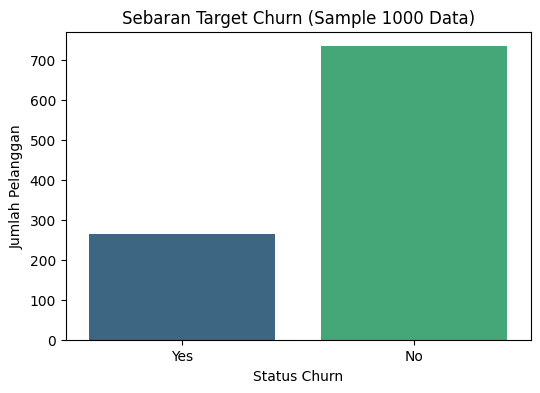

In [9]:
# 1. Cek informasi tipe data dan penggunaan memori
print("=== INFO DATASET ===")
df.info()

# 2. Cek apakah ada data yang kosong (Missing Values)
print("\n=== JUMLAH MISSING VALUES ===")
print(df.isnull().sum())

# 3. Statistik Deskriptif singkat
print("\n=== STATISTIK DATA ===")
print(df.describe())

# 4. Visualisasi Target (Churn)
# Ini penting untuk melihat apakah data seimbang atau tidak
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Sebaran Target Churn (Sample 1000 Data)')
plt.xlabel('Status Churn')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
# --- 1. CLEANING DATA (Pembersihan) ---
# Kolom 'TotalCharges' aslinya object/string, harus diubah ke angka numeric
# errors='coerce' akan mengubah text yang error/kosong menjadi NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Isi nilai NaN dengan 0 (Asumsi: pelanggan baru tenure 0 belum punya tagihan)
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# --- 2. FEATURE SELECTION (Buang Kolom Sampah) ---
# customerID hanya nomor unik, tidak ada pola untuk prediksi churn
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)
    print("Kolom 'customerID' berhasil dibuang.")

# --- 3. ENCODING (Ubah Huruf jadi Angka) ---
# Menggunakan LabelEncoder untuk mengubah kategori (Yes/No, Male/Female) jadi angka (1/0)
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# --- 4. SCALING (Penyetaraan Skala Angka) ---
# Supaya kolom 'tenure' (satuan bulan) dan 'MonthlyCharges' (satuan uang) punya bobot seimbang
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# --- 5. SAVING (Simpan Hasil Akhir) ---
# Hasil data bersih WAJIB disimpan agar bisa dipakai oleh script otomatisasi nanti
output_path = 'telco_churn_preprocessing/train_processed.csv'

# Pastikan folder ada (opsional, tapi aman)
import os
os.makedirs('telco_churn_preprocessing', exist_ok=True)

df.to_csv(output_path, index=False)

print("\n=== PREPROCESSING SELESAI ===")
print(f"Data bersih telah disimpan di: {output_path}")
print("\n5 Data Teratas (Format Angka Siap Latih):")
df.head()

Kolom 'customerID' berhasil dibuang.

=== PREPROCESSING SELESAI ===
Data bersih telah disimpan di: telco_churn_preprocessing/train_processed.csv

5 Data Teratas (Format Angka Siap Latih):


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,0,0,1,0,-1.242751,0,1,0,0,0,0,0,0,0,0,1,2,-1.317438,-0.976692,1
2715,1,0,0,0,0.362300,1,2,2,1,1,1,1,1,1,0,1,0,-1.302370,-0.538541,0
3825,0,0,1,1,0.803689,1,0,2,1,1,1,1,1,1,2,0,3,-1.499921,-0.522646,0
1807,0,0,0,0,-1.242751,1,0,1,0,0,2,0,0,0,0,0,2,0.408618,-0.953446,1
132,1,0,0,0,1.405584,1,0,0,0,0,0,2,0,0,2,0,0,-0.455247,0.482216,0
